# Prediction For Heart Attack 

Prediction On The Bssis of    
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('./heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().mean()*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

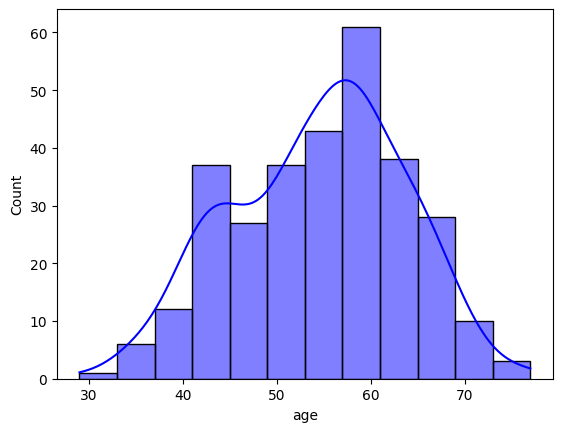

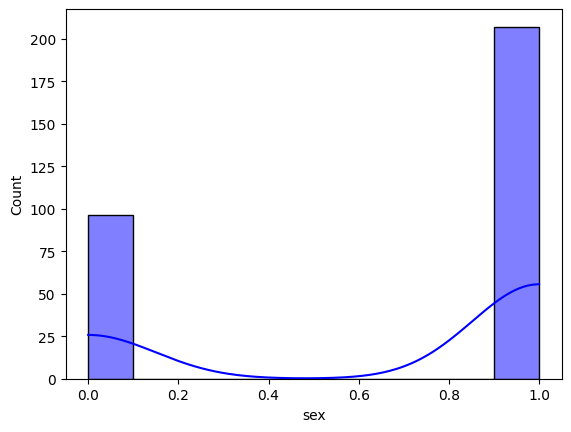

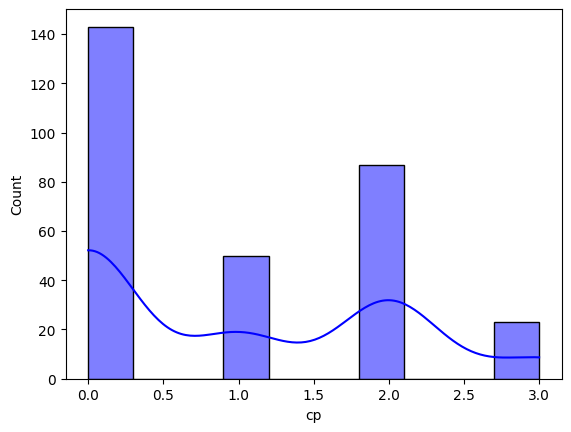

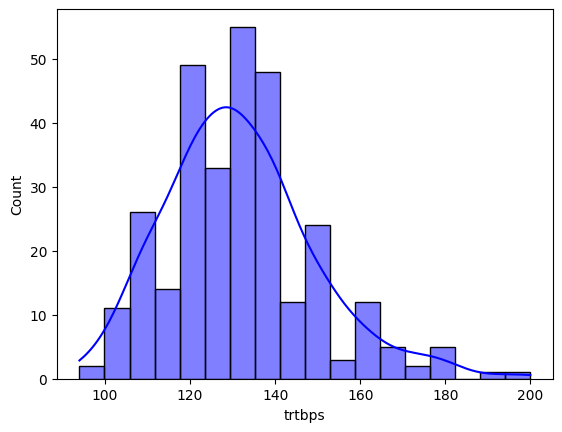

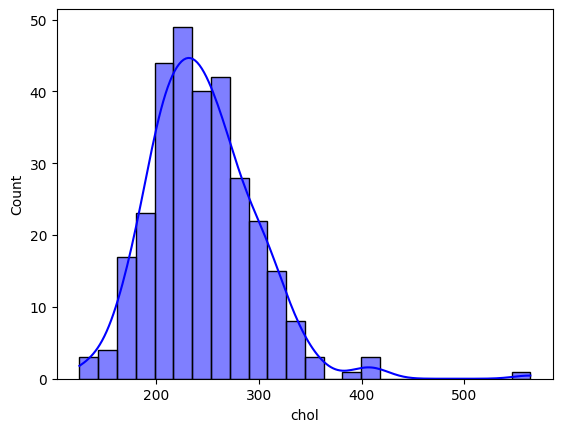

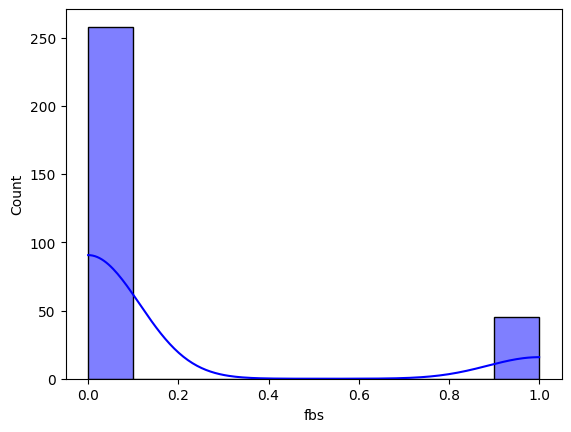

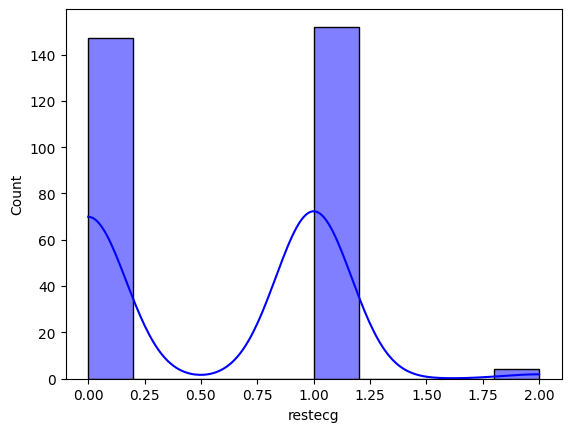

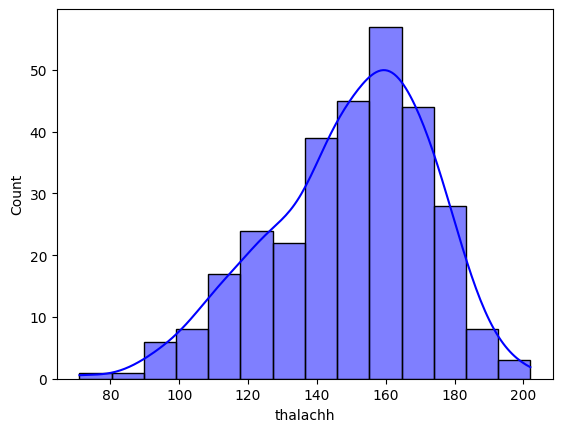

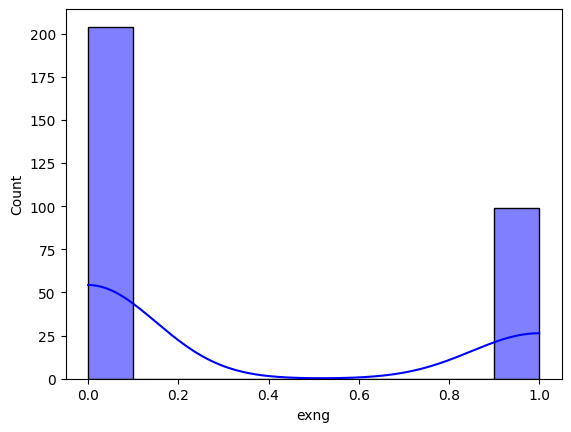

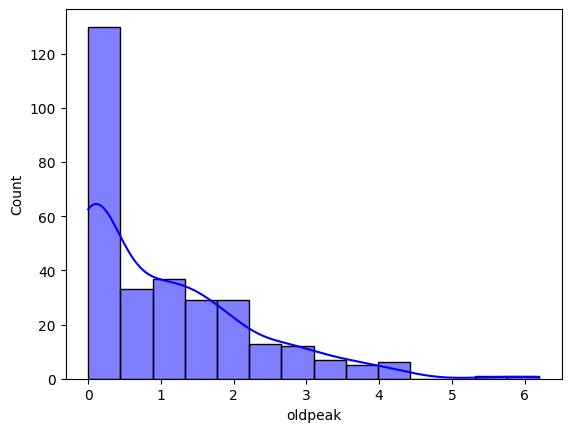

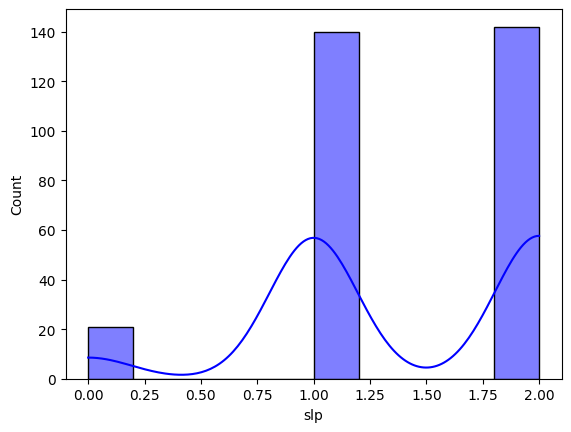

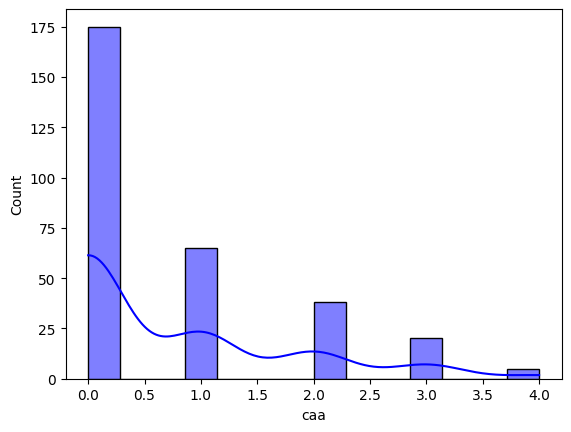

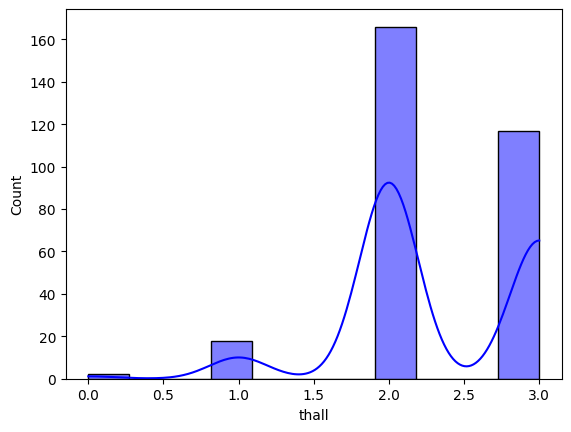

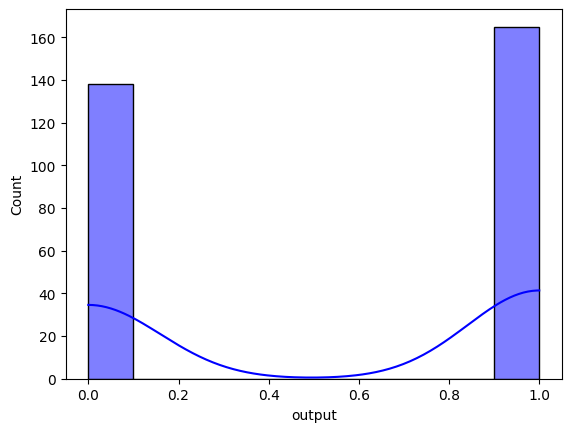

In [6]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color='blue')
        plt.show()

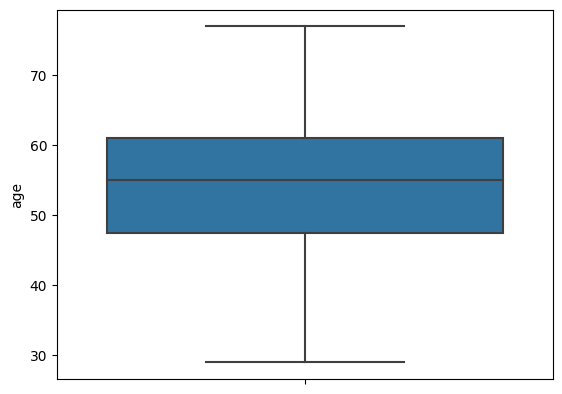

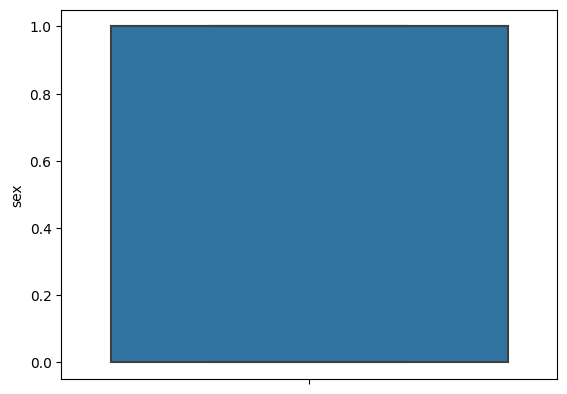

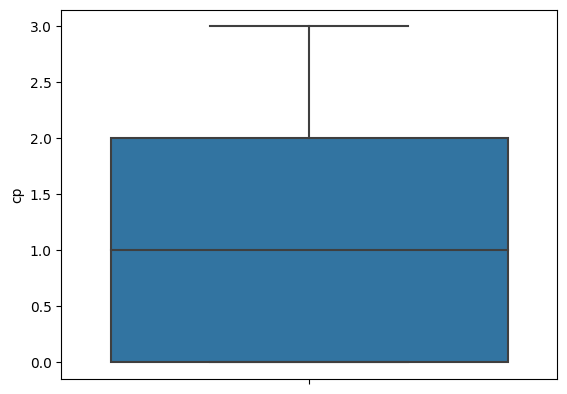

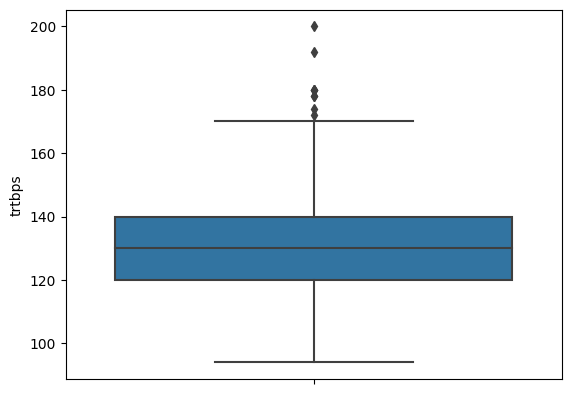

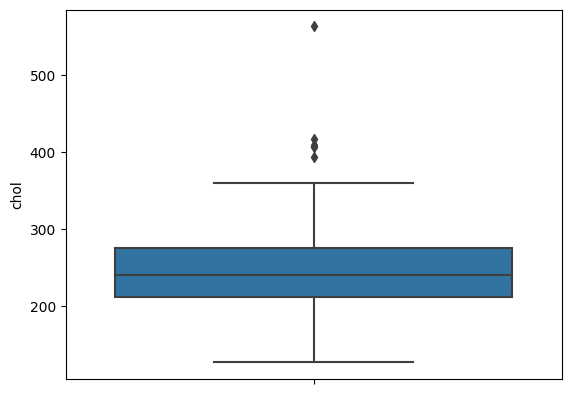

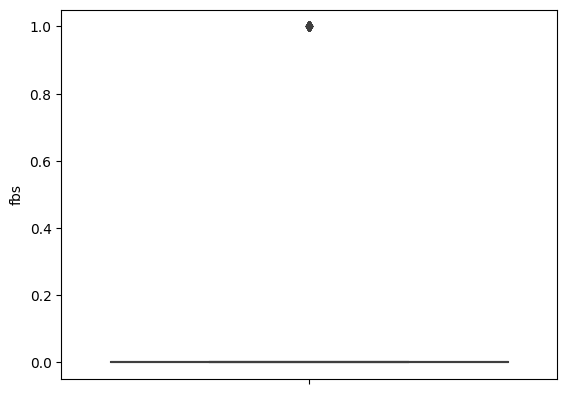

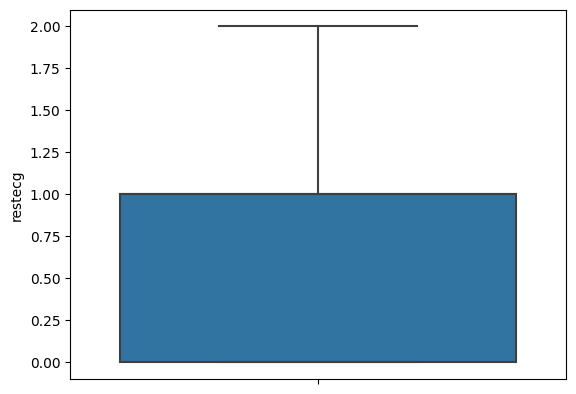

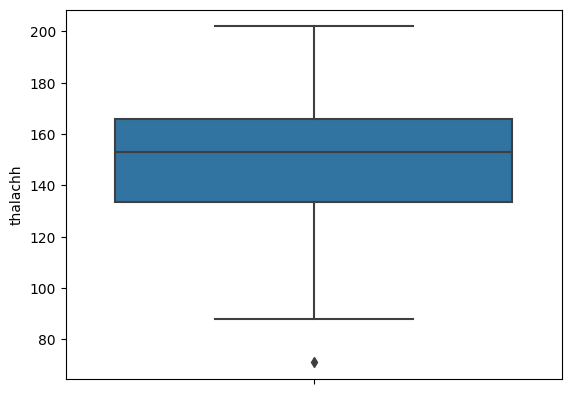

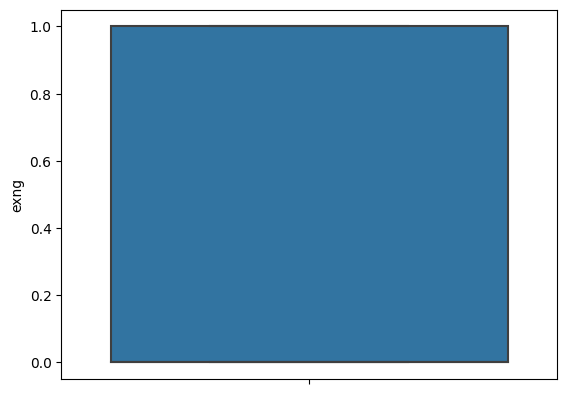

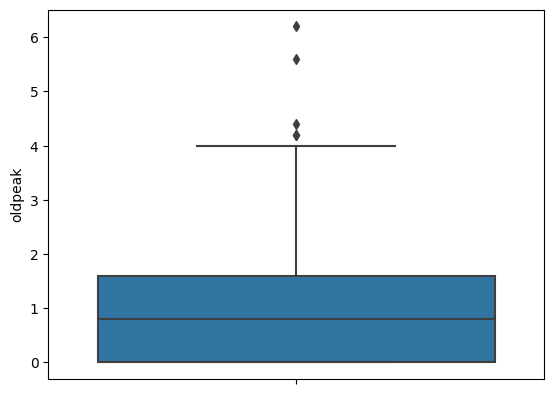

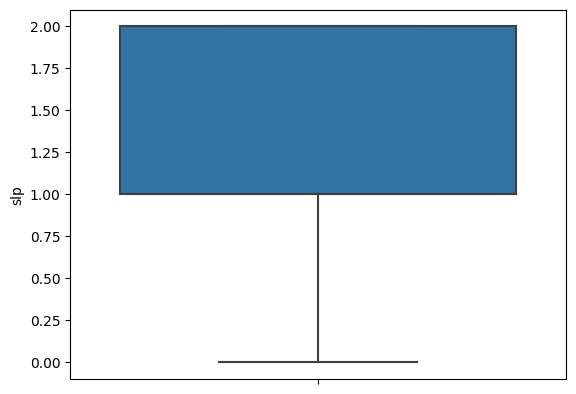

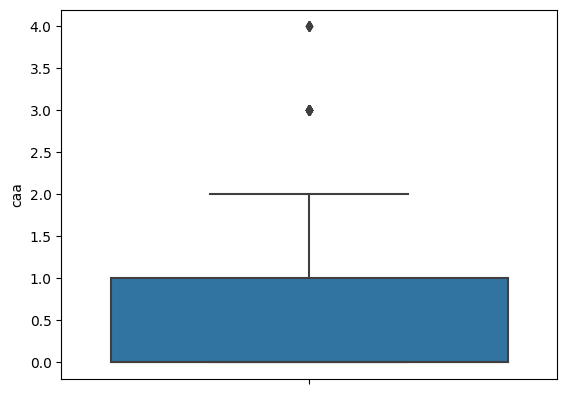

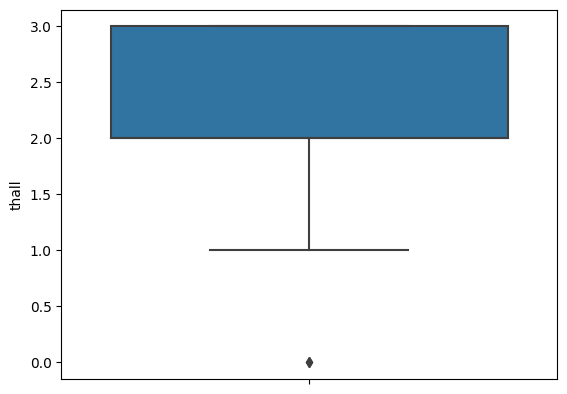

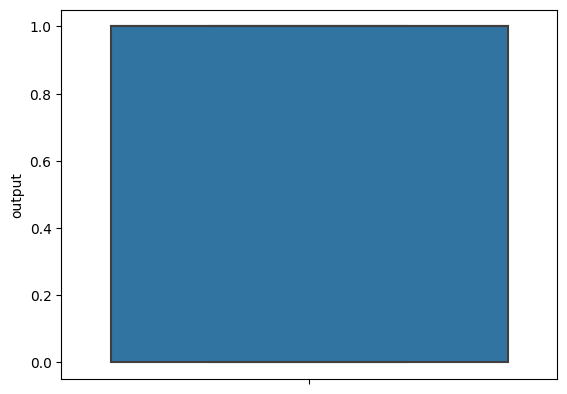

In [7]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [8]:
df.size

4242

In [9]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [10]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

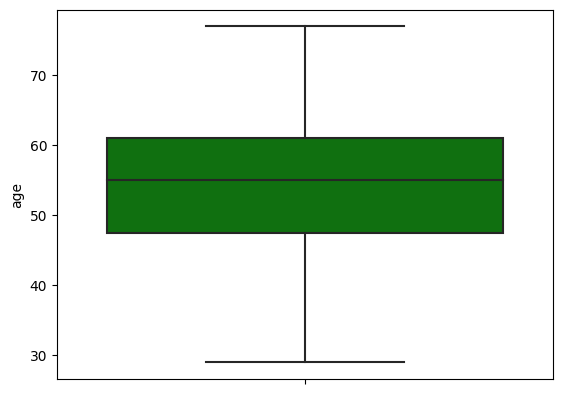

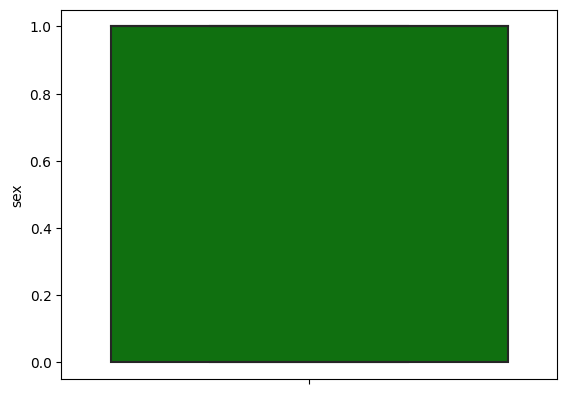

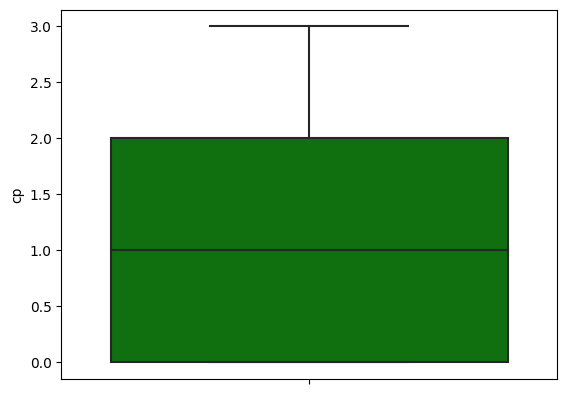

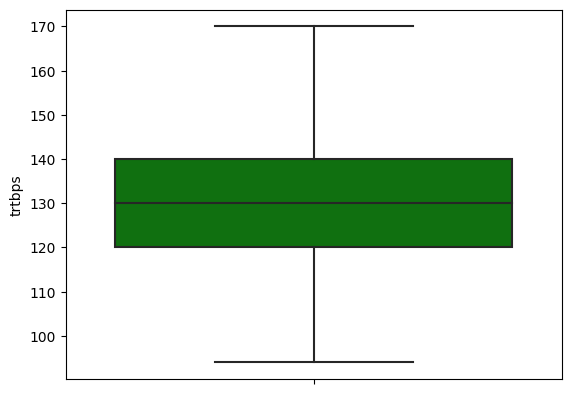

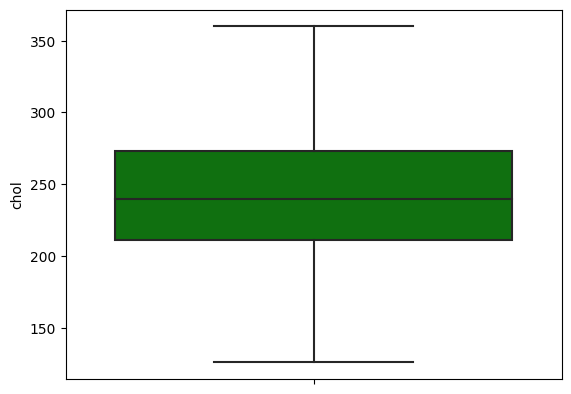

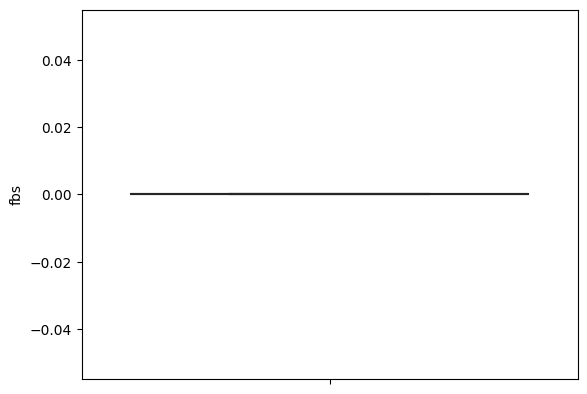

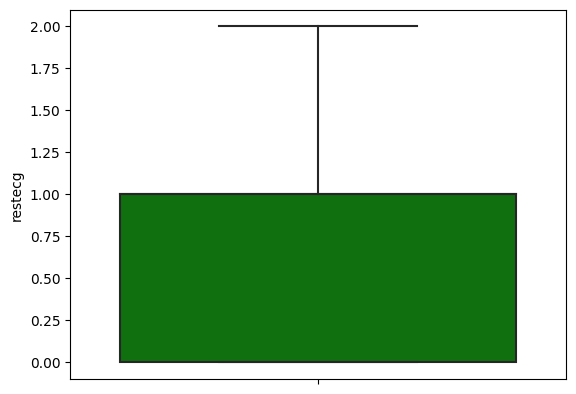

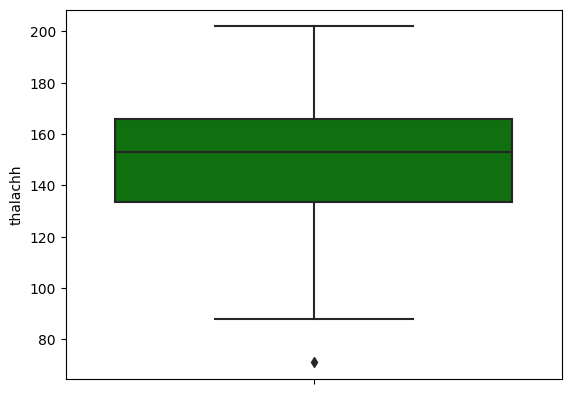

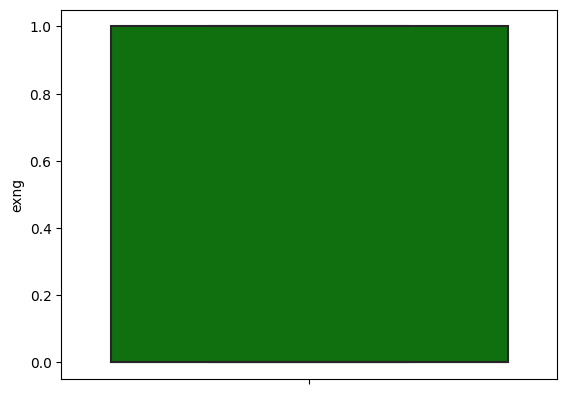

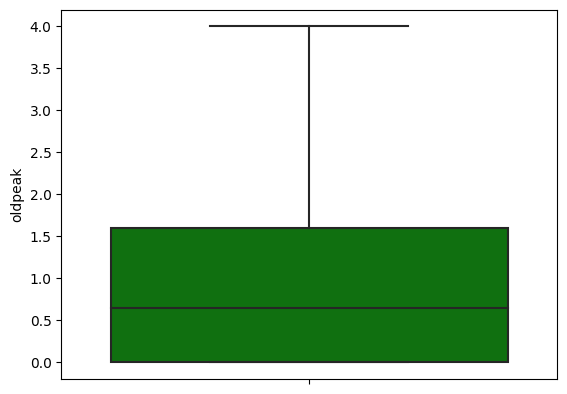

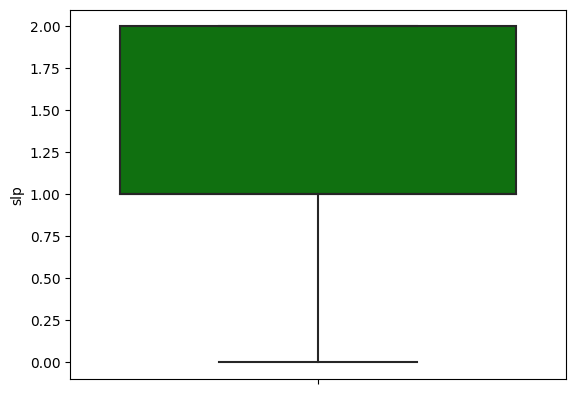

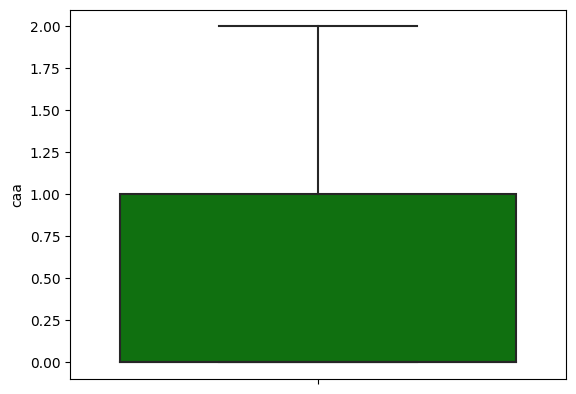

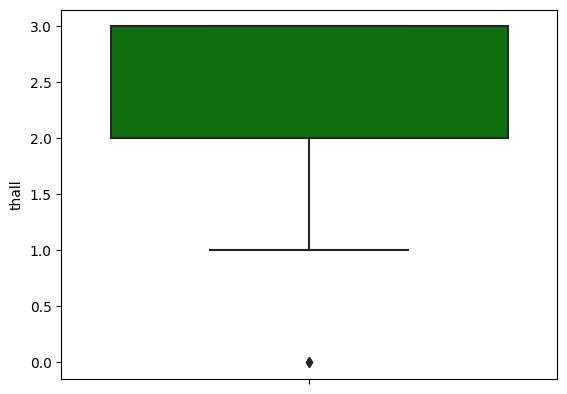

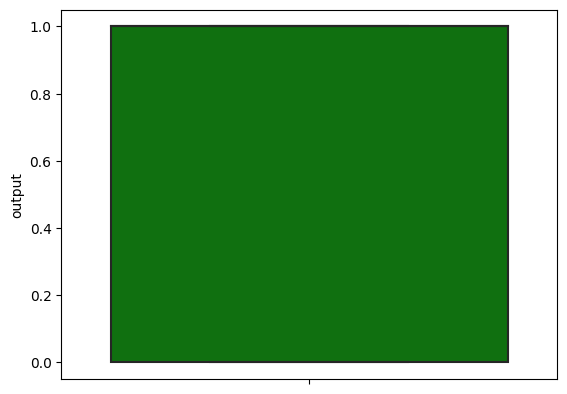

In [11]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="green")
        plt.show()

In [12]:
df.size

4242

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    294 non-null    float64
 4   chol      298 non-null    float64
 5   fbs       258 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   298 non-null    float64
 10  slp       303 non-null    float64
 11  caa       278 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [14]:
df.isna().mean()*100

age          0.000000
sex          0.000000
cp           0.000000
trtbps       2.970297
chol         1.650165
fbs         14.851485
restecg      0.000000
thalachh     0.000000
exng         0.000000
oldpeak      1.650165
slp          0.000000
caa          8.250825
thall        0.000000
output       0.000000
dtype: float64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().mean()*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [17]:
df.size

3220

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

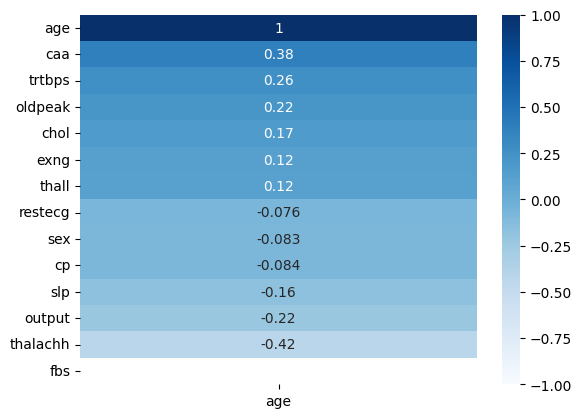

In [19]:
sns.heatmap(df.corr()[["age"]].sort_values(by="age", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [20]:
x = df.iloc[:,:-1].values

In [21]:
y= df.iloc[:, -6].values

In [22]:
sc=StandardScaler()

In [23]:
x= sc.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  1.0
Model accuracy on test is::  1.0
confusion_matrix train is::  [[127   0]
 [  0  57]]
confusion_matrix test is::  [[31  0]
 [ 0 15]]
Wrong Predictions made: 0 / 46
************************************************************


In [27]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [28]:
OUTPUT.head(30)

,ACTUAL,PREDICTION
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


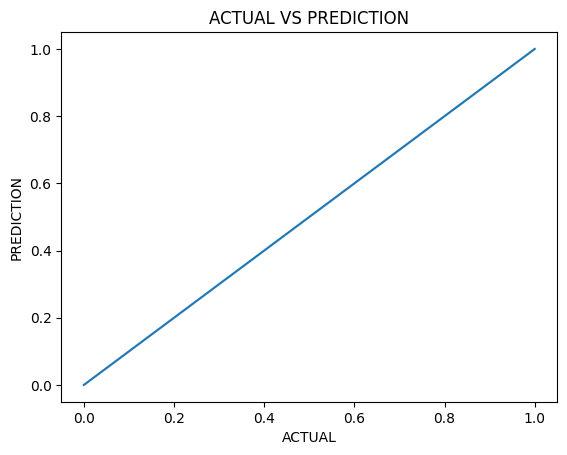

In [29]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()

Model used is::  LogisticRegression()


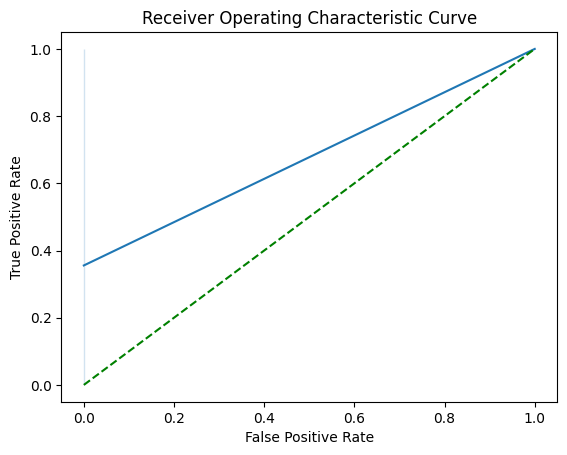

In [30]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [34]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return model.predict(x)